In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson, norm

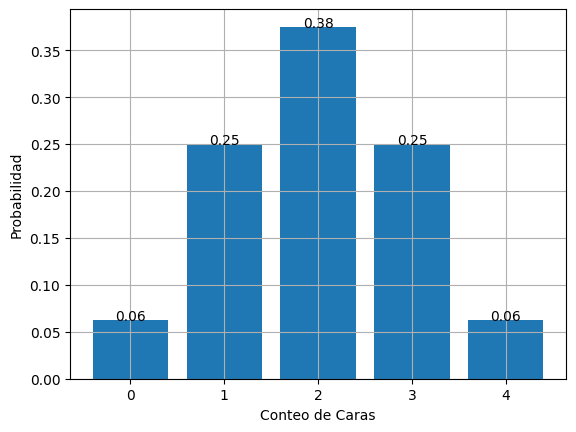

In [2]:
# En un lanzamiento de 4 monedas cual es la probabilidad de obtener dos caras P(X=2), y cual es la probabilidad de obtener 3 o menos caras P(X<=3) hint= esto es sumar la P(X=0) + P(X=1) + P(X=3)
# espacio_muestra = 0, 1, 2, 3, 4 todas estas muestras son independientes se puede modelar con una distribucion binomial
n = 4
p = 0.5
results = [0,1,2,3,4] # Para hacerlo de manera automatica list(range(n+1))
freqs = [binom.pmf(i,n,p) for i in results] # Los argumentos de binom.pmf son numero de exitos, eventos y probabilidad
plt.bar(results,freqs)
for i, val in enumerate(freqs): #enumerate nos devuelve como primer termino el indice de la coleccion y como segundo termino el valor
    plt.text(i, val, round(val,2), ha="center") #los argumentos de text son las coordenadas x, y, y, y el valor a escribir 
plt.grid(True)
plt.xlabel("Conteo de Caras")
plt.ylabel("Probabilidad")
plt.show()


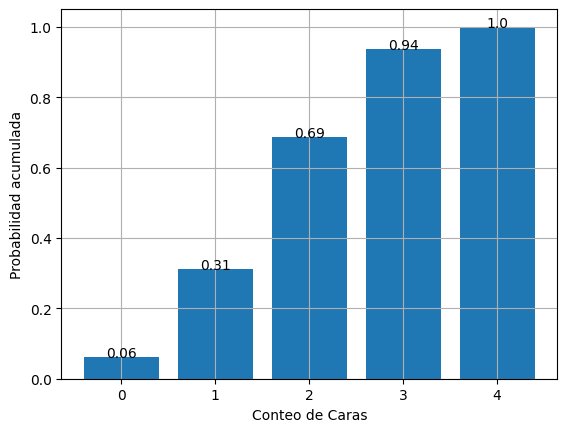

In [3]:
accum_freqs = [sum(freqs[:i+1]) for i in range(len(freqs))] #Acumulado de las probabilidades que al final suman 1
plt.bar(results, accum_freqs)
for i, val in enumerate(accum_freqs): 
    plt.text(i, val, round(val,2), ha="center")
plt.grid(True)
plt.xlabel("Conteo de Caras")
plt.ylabel("Probabilidad acumulada")
plt.show()


In [4]:
binom.pmf(1,4,0.5) #Tres argumentos el primero es el numero de exitos, el segundo es la cantidad de eventos, y el ultimo es la probabilidad

np.float64(0.25)

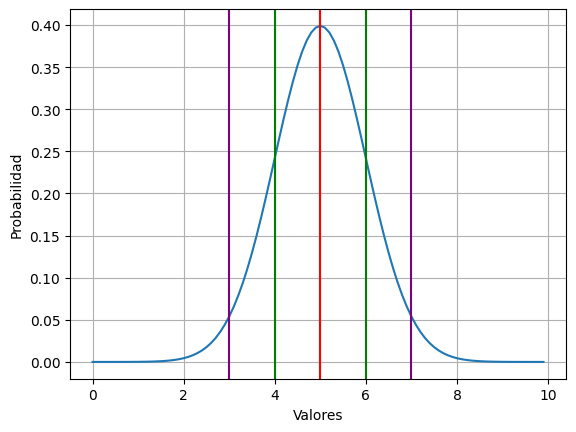

In [5]:
#NORMAL DISTRIBUTION: Es una probabilidad limite 
start = 0
end = 10
num = 100
numbers = [start+i*(end-start)/num for i in range(num)]
freqs = [norm.pdf(value,5,1) for value in numbers ] #Los argumentos de norm.pdf son numero de sucesos, la media es el segundo y por ultimo la desviacion estandar
plt.plot(numbers, freqs)
plt.grid(True)
plt.axvline(5, color="red")
plt.axvline(4, color="green")
plt.axvline(6, color="green")
plt.axvline(3, color="purple")
plt.axvline(7, color="purple")
plt.xlabel("Valores")
plt.ylabel("Probabilidad")
plt.show()

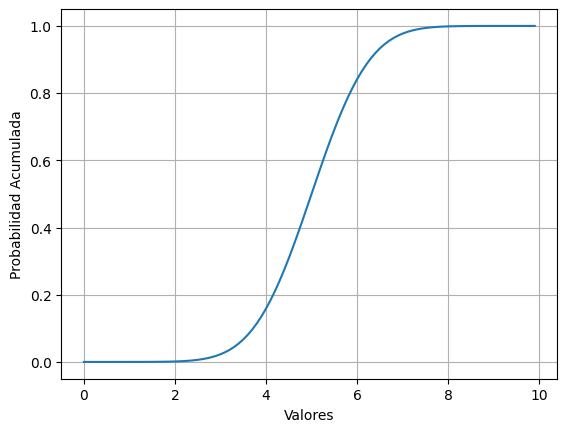

In [6]:
#Grafica de probabilidad acumulada
accum_freqs = [norm.cdf(value,5,1) for value in numbers ] 
plt.plot(numbers, accum_freqs)
plt.grid(True)
plt.xlabel("Valores")
plt.ylabel("Probabilidad Acumulada")
plt.show()

In [7]:
#Una maquina produce sacos de centeno que pesan 3kg con una desviacion estandar de 0.5 kg. Un operario opina que la maquina no está bien calibrada. Toma una muestra de sacos al azar
# [2.3, 2.9, 3.1, 2.5, 2.8, 3.0, 2.7] e indica que la maquina no esta haciendo sacos de 3kg. ¿Podemos darle la razon al operador?
# Definir la hipotesis, es correcta o no
# H0: mu = 3
# H1: mu ! = 3
# Nivel de significancia: alpha = 0.05
# Los parametros dados, son poblacionales.

sacks = np.array([2.3, 2.9, 3.1, 2.5, 2.8, 3.0, 2.7])
population_mean = 3
population_std = 0.5
sample_mean = sacks.mean()
sample_std = sacks.std()
print(f'media: {sample_mean:.2f} y desviacion: {sample_std:.2f}')

media: 2.76 y desviacion: 0.26


In [8]:
z_score = (sample_mean - population_mean) / (population_std/np.sqrt(len(sacks)))
# En el numerador la diferencia de la media poblacional y muestral y el denominador es la desviacion estandar de la poblacion entre la raiz cuadrada de la cantidad de muestras (error estandar)

# Cuanto a la izquierda en error estandarz_score 
p_value = 2 * (1 - norm.cdf(abs(z_score)))

print(f'z_score: {z_score:.2f} y el p_value es: {p_value:.2f}') 
#Si el p value es mayor al nivel de significancia rechazamos la hipotesis alterna
#Si el p_value es menor al nivel de significancia no se tienen argumentos para rechazar la hipotesis alterna
#NO LE DAMOS LA RAZON AL OPERARIO 

z_score: -1.29 y el p_value es: 0.20
